<h1 align='center'><b>Введение в нейронные сети<b></h1>

<h1 align='left'>Урок 4. Сверточные нейронные сети</h1>

<h2 align='center'>Практическое задание</h2>

<ol>
  <li>Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.
  </li>
  <li>Описать также в анализе какие необоходимо внести изменения  в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.
  </li>
</ol>

In [91]:
import numpy as np
import pandas as pd


from __future__ import print_function
import keras 
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os

import matplotlib.pyplot as plt

In [66]:
tf.random.set_seed(42)

In [67]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [69]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

In [70]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1 # оставил как на лекции
data_augmentation = True
num_predictions = 20
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_cifar10_trained_model.h5'

In [71]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


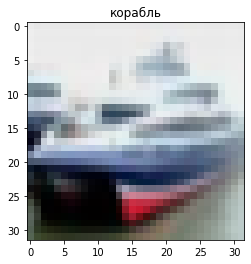

In [68]:
N = 1

plt.imshow(x_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

## 1. Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.

### 1. Базовая модель

In [72]:
# конфигурирование слоев нейросети
model_0 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_0.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_0.add(Activation('relu'))
model_0.add(Conv2D(32, (3, 3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(Dropout(0.25))

model_0.add(Conv2D(64, (3, 3), padding='same'))
model_0.add(Activation('relu'))
model_0.add(Conv2D(64, (3, 3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_0.add(Flatten())
model_0.add(Dense(512))
model_0.add(Activation('relu'))
model_0.add(Dropout(0.5))
model_0.add(Dense(num_classes))
model_0.add(Activation('softmax'))

model_0.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model_0.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
#     # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

#     # проверка работы обученной модели
# scores = model_0.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_32 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_33 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 15, 15, 32)        0         
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
<ipython-input-72-7b4c125d1593>:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_0.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 39s 24ms/step - loss: 1.8460 - accuracy: 0.3205 - val_loss: 1.5602 - val_accuracy: 0.4352


In [73]:
train_loss, train_m = model_0.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_0.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(0)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 4s - loss: 1.5643 - accuracy: 0.4354 - 4s/epoch - 3ms/step
313/313 - 1s - loss: 1.5602 - accuracy: 0.4352 - 916ms/epoch - 3ms/step
train_loss: 1.564345121383667, train_accuracy: 0.4354400038719177
test_loss: 1.5601599216461182, test_accuracy: 0.4352000057697296


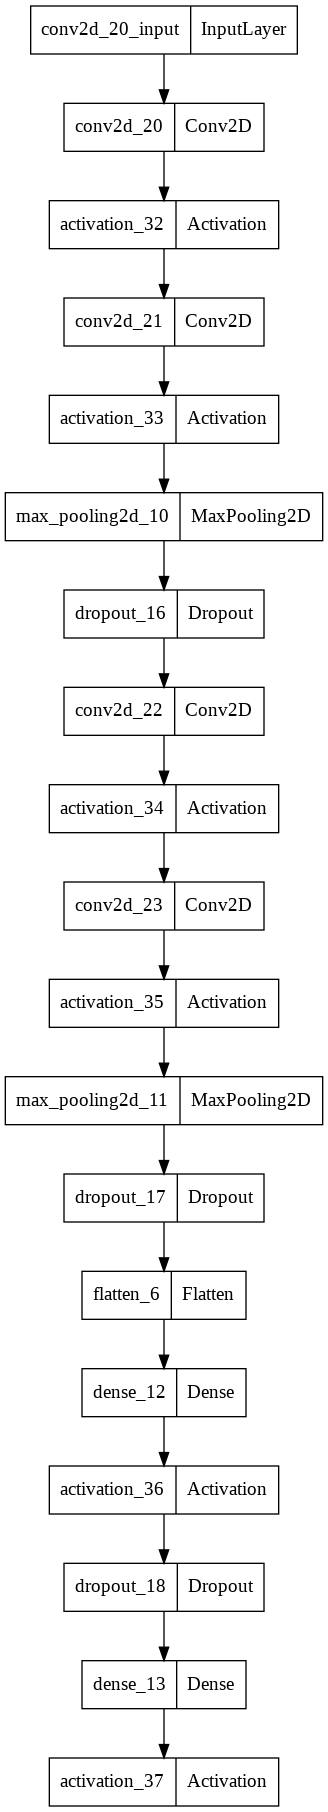

In [97]:
tf.keras.utils.plot_model(model_0)

1/1 [==============================] - 0s 69ms/step


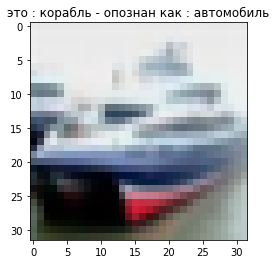

In [74]:
N = 1
y_p = model_0.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 2. Оценим изменение точности при увеличении ширины сети (больше фильтров)

In [75]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(256, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model_1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
#     # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

#     # проверка работы обученной модели
# scores = model_1.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_38 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_39 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 15, 15, 32)        0         
                                                      

<ipython-input-75-167d5463efbb>:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_1.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 40s 25ms/step - loss: 1.7515 - accuracy: 0.3584 - val_loss: 1.6363 - val_accuracy: 0.4136


In [76]:
train_loss, train_m = model_1.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Больше каналов (увеличение ширины)')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 5s - loss: 1.6440 - accuracy: 0.4159 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 1.6363 - accuracy: 0.4136 - 983ms/epoch - 3ms/step
train_loss: 1.6439670324325562, train_accuracy: 0.4158799946308136
test_loss: 1.6362625360488892, test_accuracy: 0.41359999775886536


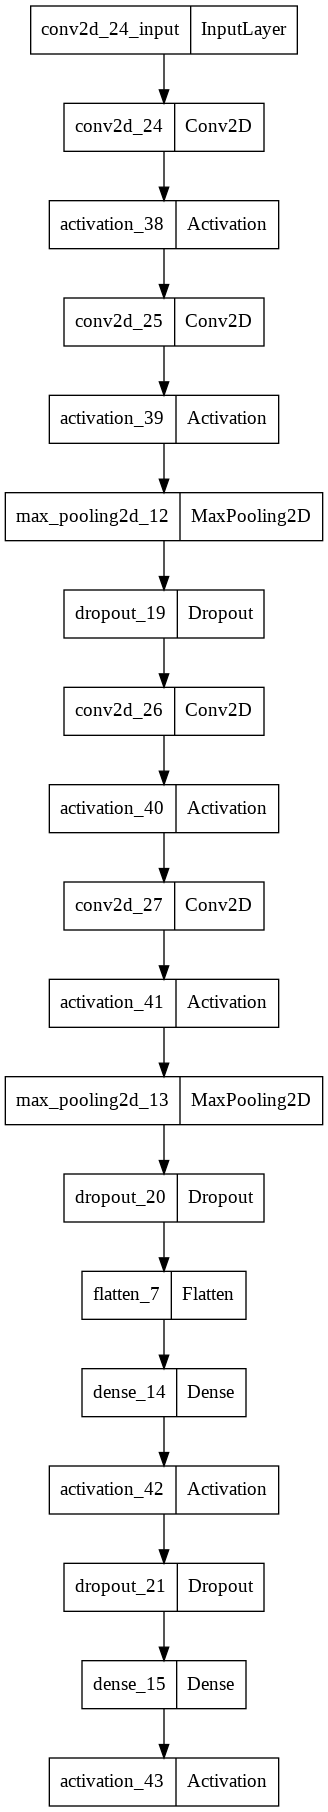

In [98]:
tf.keras.utils.plot_model(model_1)

1/1 [==============================] - 0s 78ms/step


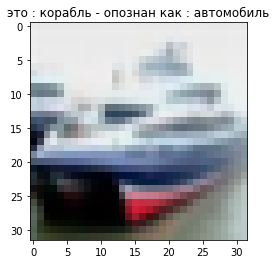

In [77]:
N = 1
y_p = model_1.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 3. Оценить рост точности при увеличении глубины сети (больше слоев)

In [78]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model_2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
#     # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

#     # проверка работы обученной модели
# scores = model_2.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_44 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_45 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 15, 15, 32)        0         
                                                      

<ipython-input-78-b5e125e4efbd>:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_2.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 40s 25ms/step - loss: 1.7961 - accuracy: 0.3386 - val_loss: 1.5613 - val_accuracy: 0.4414


In [79]:
train_loss, train_m = model_2.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Больше слоёв (увеличение глубины)')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 5s - loss: 1.5701 - accuracy: 0.4385 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 1.5613 - accuracy: 0.4414 - 976ms/epoch - 3ms/step
train_loss: 1.5701239109039307, train_accuracy: 0.4385400116443634
test_loss: 1.5612614154815674, test_accuracy: 0.4413999915122986


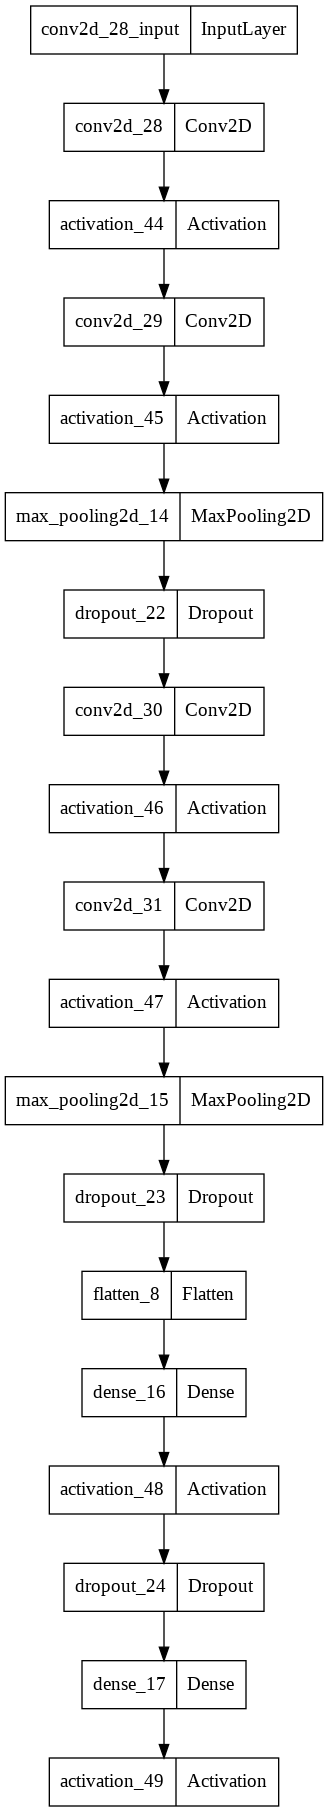

In [99]:
tf.keras.utils.plot_model(model_2)

1/1 [==============================] - 0s 66ms/step


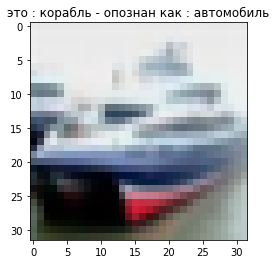

In [80]:
N = 1
y_p = model_2.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

1/1 [==============================] - 0s 16ms/step


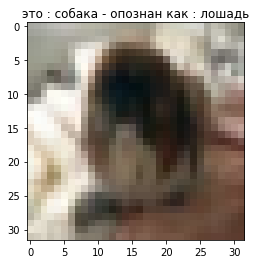

In [81]:
N = 200
y_p = model_2.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 4. Полносвязная сеть для этой выборки

In [82]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# полносвязные слои нейронной сети
model_3.add(Flatten(input_shape=x_train.shape[1:]))
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model_3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
#     # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

#     # проверка работы обученной модели
# scores = model_3.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1573376   
                                                                 
 activation_50 (Activation)  (None, 512)               0         
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
 activation_51 (Activation)  (None, 10)                0         
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
No

<ipython-input-82-baba3c798fd7>:58: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_3.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 36s 23ms/step - loss: 2.0189 - accuracy: 0.2660 - val_loss: 1.8267 - val_accuracy: 0.3592


In [83]:
train_loss, train_m = model_3.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 3s - loss: 1.8273 - accuracy: 0.3629 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 1.8267 - accuracy: 0.3592 - 617ms/epoch - 2ms/step
train_loss: 1.827298641204834, train_accuracy: 0.36287999153137207
test_loss: 1.826740026473999, test_accuracy: 0.35920000076293945


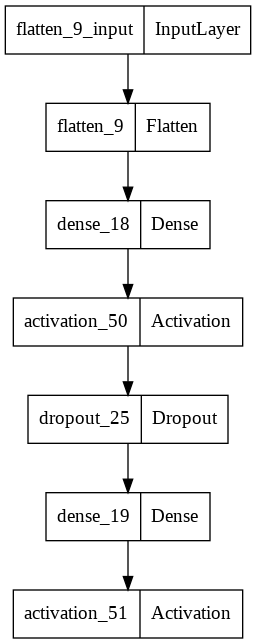

In [100]:
tf.keras.utils.plot_model(model_3)

1/1 [==============================] - 0s 35ms/step


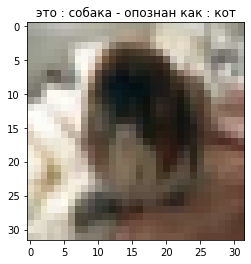

In [84]:
N = 200
y_p = model_3.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

1/1 [==============================] - 0s 16ms/step


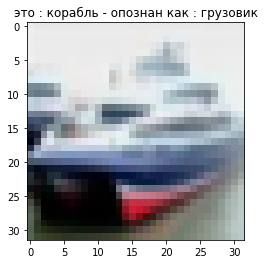

In [85]:
N = 1
y_p = model_3.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [86]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc
results['test_acc'] = test_acc

In [87]:
results

,step,desc,train_acc,test_acc
0,0,Базовая модель,0.44,0.44
1,1,Больше каналов (увеличение ширины),0.42,0.41
2,2,Больше слоёв (увеличение глубины),0.44,0.44
3,3,Полносвязная сеть,0.36,0.36


## Выводы:<br>
* увеличение количества каналов, т.е. увеличение итогового количества признаков, увеличило значение метрики;
* увеличение глубины сети тоже увеличило метрику качества, немногим больше, чем с увеличением количества каналов;
* полносвязная сеть без сверточных слоев показывает качество ниже, чем базовая модель со сверточными слоями.

## 2. Описать также в анализе какие необоходимо внести изменения  в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

Набор данных CIFAR-10 состоит из 60000 цветных изображений 32x32 в 10 классах, по 6000 изображений в каждом классе. Есть 50000 обучающих изображений и 10000 тестовых изображений.  

Набор данных MNIST аналогичен cifar10 по количеству классов. Их там тоже 10. Но размер изображений 28х28.  

Изменится batch_size = 28.  

Набор данных CIFAR-100 аналогичен CIFAR-10, за исключением того, что он содержит 100 классов, содержащих по 600 изображений в каждом. В каждом классе есть 500 обучающих изображений и 100 тестовых изображений. 100 классов в CIFAR-100 сгруппированы в 20 суперклассов. Каждое изображение имеет метку «точно» (класс, к которому оно принадлежит) и метку «грубо» (надкласс, к которому оно принадлежит).  

Изменится num_classes = 100.  

База данных Imagenet — проект по созданию и сопровождению массивной базы данных аннотированных изображений. Аннотация изображений происходит путем краудсорсинга сообществом. Из-за этого достигается большое количество размеченных данных. Особенность данного набора данных — про каждую картинку известно несколько фактов вида "в этом прямоугольнике есть автомобиль" (см. рис. 4), что в совокупности с индексом по типам объектов, которые есть на изображениях, позволяет обучить алгоритм для распознавания объектов какой-то конкретной категории. 

Здесь трудно сказать. Скорее всего данная нейронняа сеть окажется слишком простой и неподходящей для работы с этим датасетом.



